##  Predicting Hiring Decisions in Recruitment Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook/data/recruitment_data.csv')
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


### Age
### Gender Male (0) or Female (1).
### Education level;1: Bachelor's (Type 1),2: Bachelor's (Type 2),3: Master's,4: PhD
### Experience  Number of years of professional experience..
### previouscomapnies: Number of previous companies where the candidate has workedco6. mpanies.
### Distance;Distance in kilometers from the candidate's residence to the hiring company.
### interview score(%); Score achieved by the candidate in the interview process.
### skill score(%);Assessment score of the candidate's technical skills.
### personality score(%)Evaluation score of the candidate's personality traits.
### recruitments strategy ;Strategy adopted by the hiring team for recruitment.
### hiring decision 1;hired 0;not hired

In [6]:
df.columns = df.columns.str.lower()
df.columns


Index(['age', 'gender', 'educationlevel', 'experienceyears',
       'previouscompanies', 'distancefromcompany', 'interviewscore',
       'skillscore', 'personalityscore', 'recruitmentstrategy',
       'hiringdecision'],
      dtype='object')

<Axes: xlabel='age', ylabel='Density'>

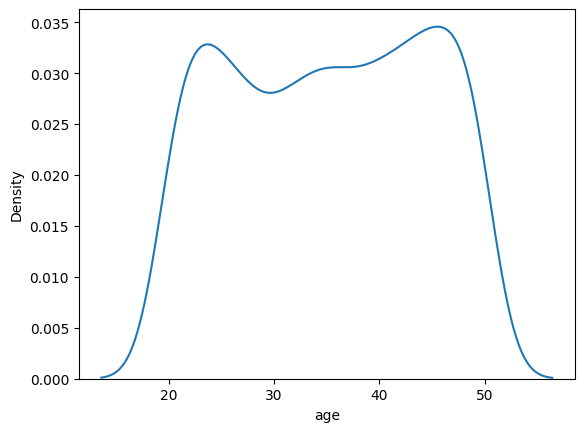

In [7]:
sns.kdeplot(x=df.age)

<Axes: xlabel='age'>

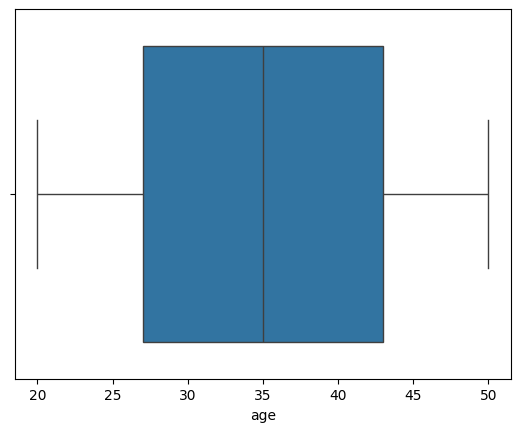

In [8]:
sns.boxplot(x=df.age)

In [9]:
df.gender.value_counts()

gender
0    762
1    738
Name: count, dtype: int64

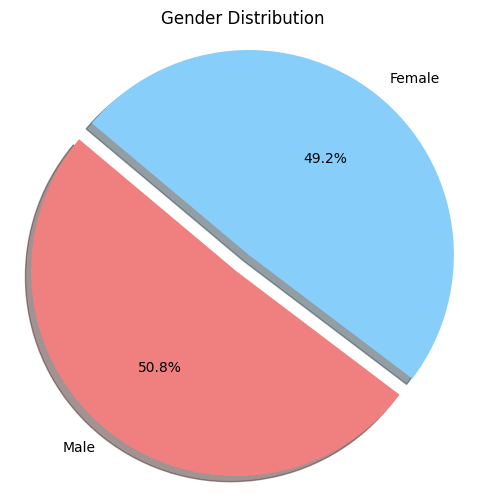

In [10]:
labels = ["Male","Female"]
sizes = df.gender.value_counts()
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0) 

plt.figure(figsize=(6,6)) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Gender Distribution')
plt.show()


In [11]:
df.educationlevel.value_counts()

educationlevel
2    740
3    317
1    307
4    136
Name: count, dtype: int64

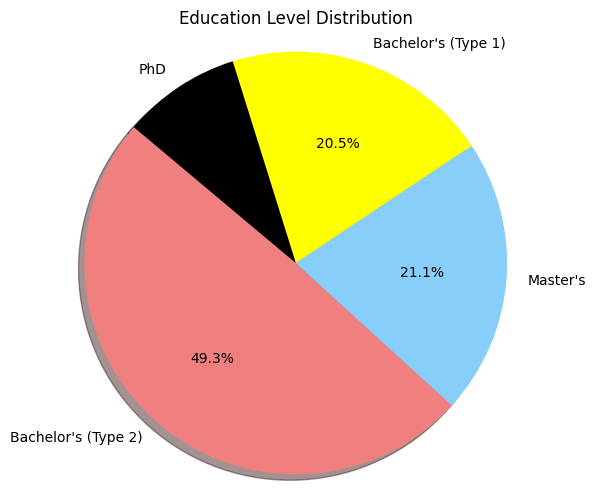

In [12]:
labels = ["Bachelor's (Type 2)","Master's","Bachelor's (Type 1)","PhD"]
sizes = df.educationlevel.value_counts()
colors = ['lightcoral', 'lightskyblue','yellow','black']

plt.figure(figsize=(6,6)) 
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Education Level Distribution')
plt.show()


<Axes: xlabel='experienceyears', ylabel='Count'>

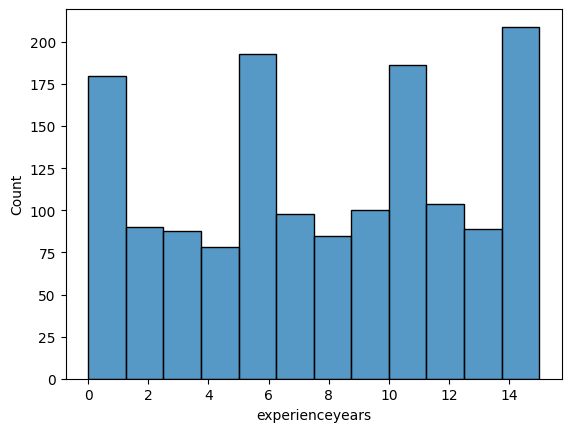

In [13]:
sns.histplot(x=df.experienceyears)

In [14]:
df.columns

Index(['age', 'gender', 'educationlevel', 'experienceyears',
       'previouscompanies', 'distancefromcompany', 'interviewscore',
       'skillscore', 'personalityscore', 'recruitmentstrategy',
       'hiringdecision'],
      dtype='object')

<Axes: xlabel='previouscompanies', ylabel='Count'>

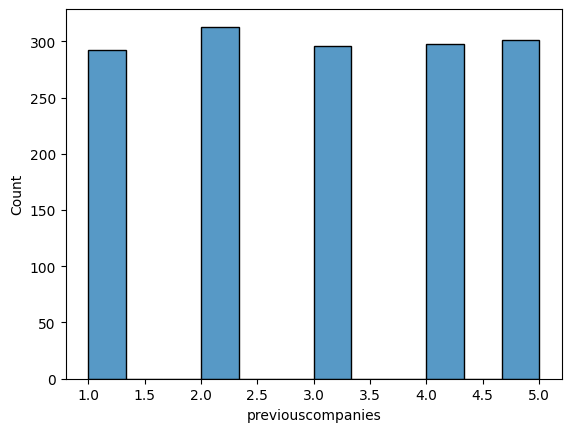

In [15]:
sns.histplot(x=df.previouscompanies)

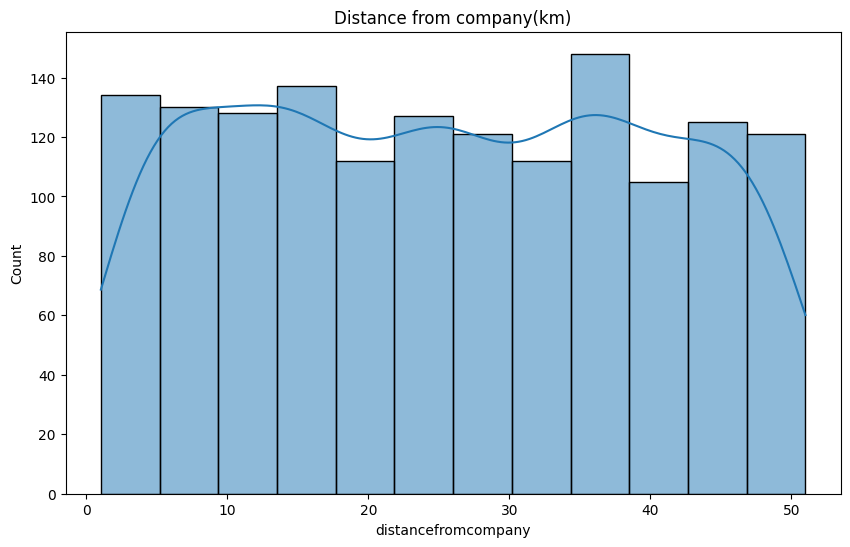

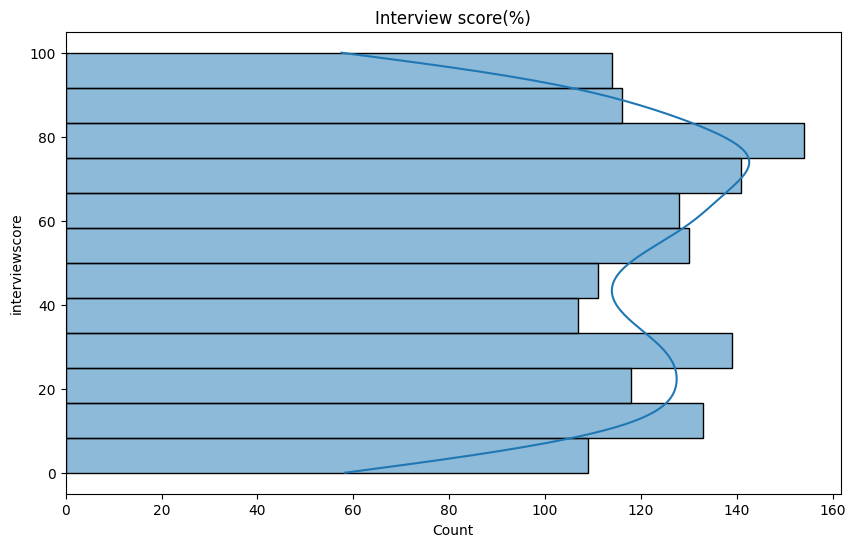

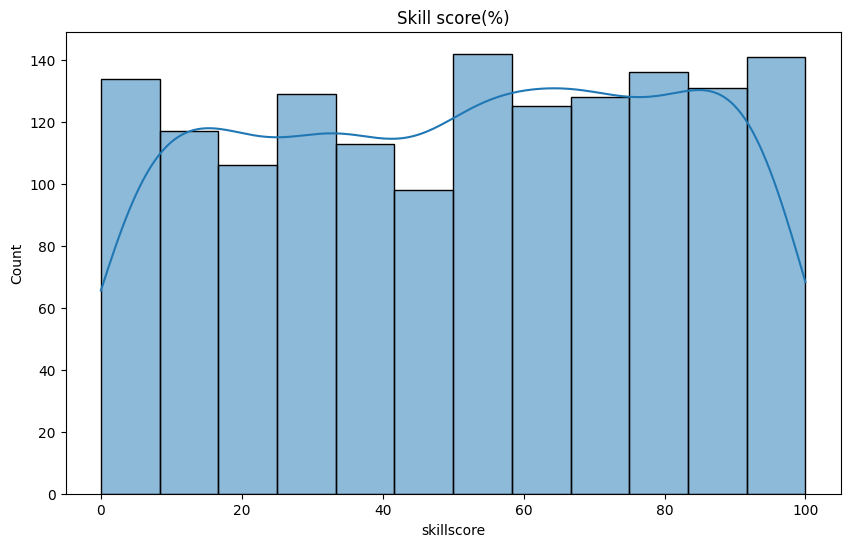

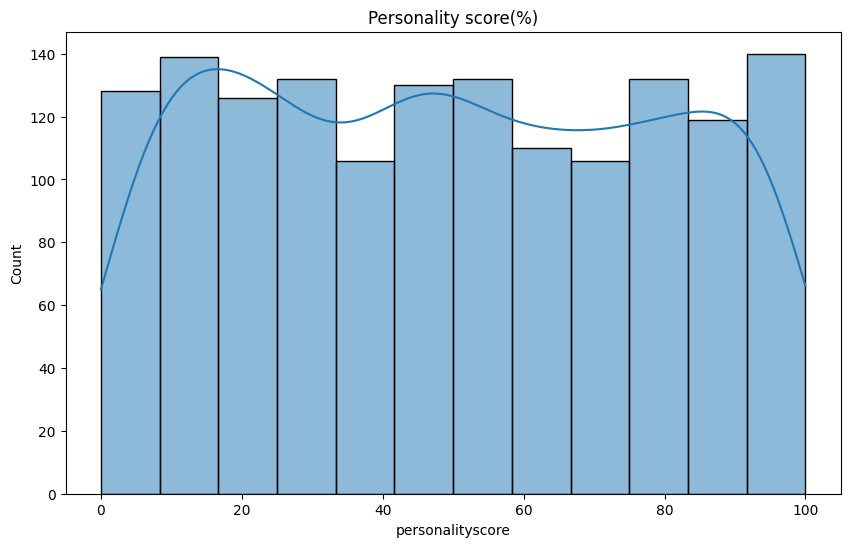

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['distancefromcompany'], kde=True)
plt.title('Distance from company(km)')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(y=df['interviewscore'],kde=True)
plt.title('Interview score(%)')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(x=df['skillscore'],kde=True)
plt.title('Skill score(%)')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(x=df['personalityscore'],kde=True)
plt.title('Personality score(%)')
plt.show()

In [17]:
df.recruitmentstrategy.value_counts()

recruitmentstrategy
2    770
1    445
3    285
Name: count, dtype: int64

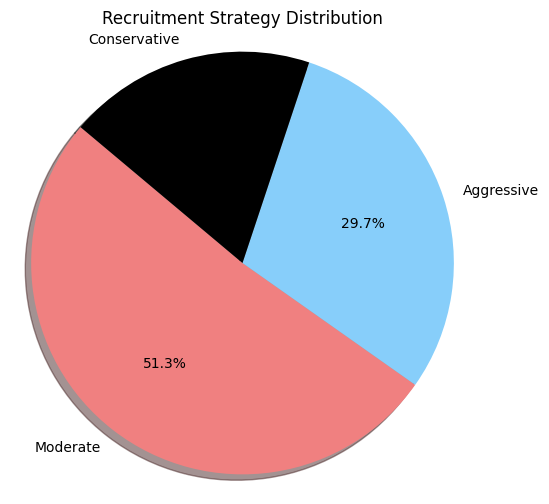

In [18]:
labels = ["Moderate","Aggressive","Conservative"]
sizes = df.recruitmentstrategy.value_counts()
colors = ['lightcoral','lightskyblue','black']

plt.figure(figsize=(6,6)) 
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')

plt.title('Recruitment Strategy Distribution')
plt.show()


<Axes: xlabel='hiringdecision', ylabel='count'>

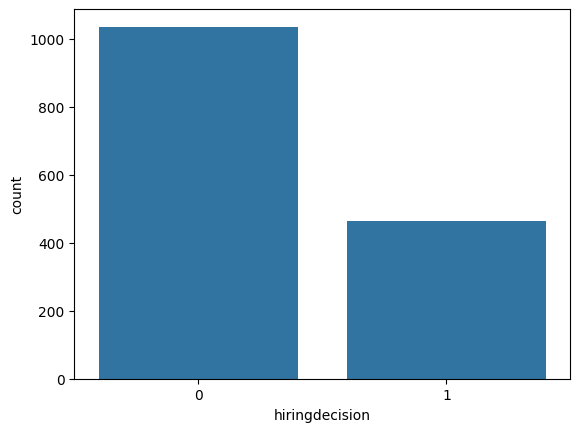

In [19]:
sns.countplot(x=df.hiringdecision)

In [20]:
df.head()

,age,gender,educationlevel,experienceyears,previouscompanies,distancefromcompany,interviewscore,skillscore,personalityscore,recruitmentstrategy,hiringdecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [21]:
def clean_ed(x):
    if x == 4:
        return 3
    if x == 3:
        return 2
    if x == 2:
        return 1
    else:
        return 0

df.educationlevel = df.educationlevel.apply(clean_ed)

In [22]:
def clean_rec(x):
    if x == 3:
        return 2
    if x == 2:
        return 1
    else:
        return 0

df.recruitmentstrategy = df.recruitmentstrategy.apply(clean_rec)
df.head()

,age,gender,educationlevel,experienceyears,previouscompanies,distancefromcompany,interviewscore,skillscore,personalityscore,recruitmentstrategy,hiringdecision
0,26,1,1,0,3,26.783828,48,78,91,0,1
1,39,1,3,12,3,25.862694,35,68,80,1,1
2,48,0,1,3,2,9.920805,20,67,13,1,0
3,34,1,1,5,2,6.407751,36,27,70,2,0
4,30,0,0,6,1,43.105343,23,52,85,1,0


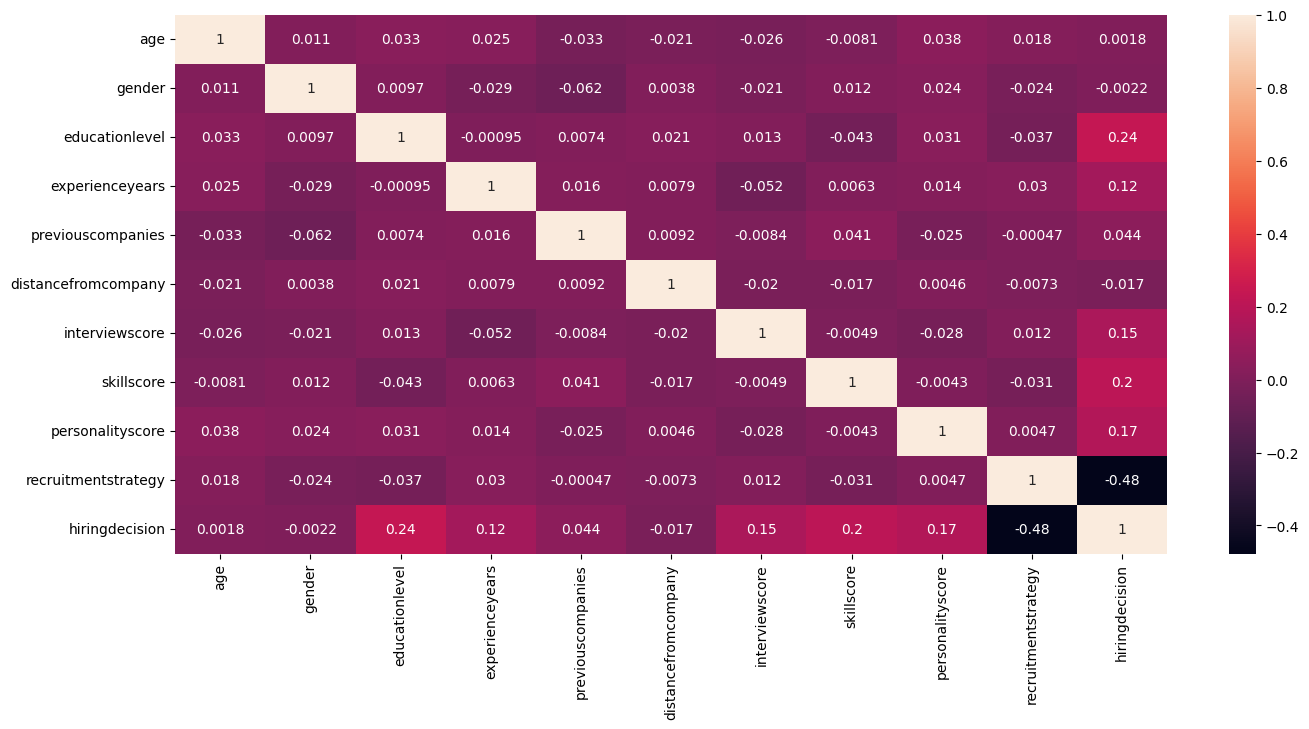

In [23]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [24]:
df.drop(['age','gender','distancefromcompany'],axis = 1,inplace = True)
df.head()

,educationlevel,experienceyears,previouscompanies,interviewscore,skillscore,personalityscore,recruitmentstrategy,hiringdecision
0,1,0,3,48,78,91,0,1
1,3,12,3,35,68,80,1,1
2,1,3,2,20,67,13,1,0
3,1,5,2,36,27,70,2,0
4,0,6,1,23,52,85,1,0


In [29]:
df.columns

Index(['educationlevel', 'experienceyears', 'previouscompanies',
       'interviewscore', 'skillscore', 'personalityscore',
       'recruitmentstrategy', 'hiringdecision'],
      dtype='object')

In [25]:
df.to_csv('C:/Users/odhia/OneDrive/Desktop/mlopsProjects/notebook/data/clean_data.csv',index=False)

In [26]:
X = df.drop('hiringdecision',axis=1)
y = df.hiringdecision

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
models = {
    'Logistic Regression':LogisticRegression(),
    'SVC':SVC(),
    'KNeighbours':KNeighborsClassifier(),
    'Cat Boost':CatBoostClassifier(logging_level='Silent'),
    'XGB':XGBClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),  
}

In [28]:
report = {}
print("Models' Report")
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    score = accuracy_score(y_test,prediction)
    report[list(models.keys())[i]] = score
best_score = max(sorted(list(report.values())))
for k,v in report.items():
    if v == best_score:
        best_model_name = k
        break
print(report)
print(f"{best_model_name} is the best model with accuracy of {best_score}")

Models' Report
{'Logistic Regression': 0.8666666666666667, 'SVC': 0.9013333333333333, 'KNeighbours': 0.896, 'Cat Boost': 0.944, 'XGB': 0.9253333333333333, 'Decision Tree': 0.896, 'Random Forest': 0.9333333333333333}
Cat Boost is the best model with accuracy of 0.944
